There are 2 no of faces in this image
Found face 1 at left_x:185,left_y:44,right_x:278,right_y:137
Found face 2 at left_x:407,left_y:102,right_x:502,right_y:197


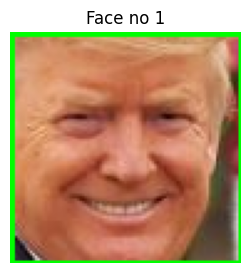

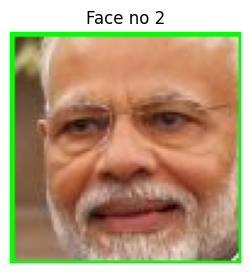

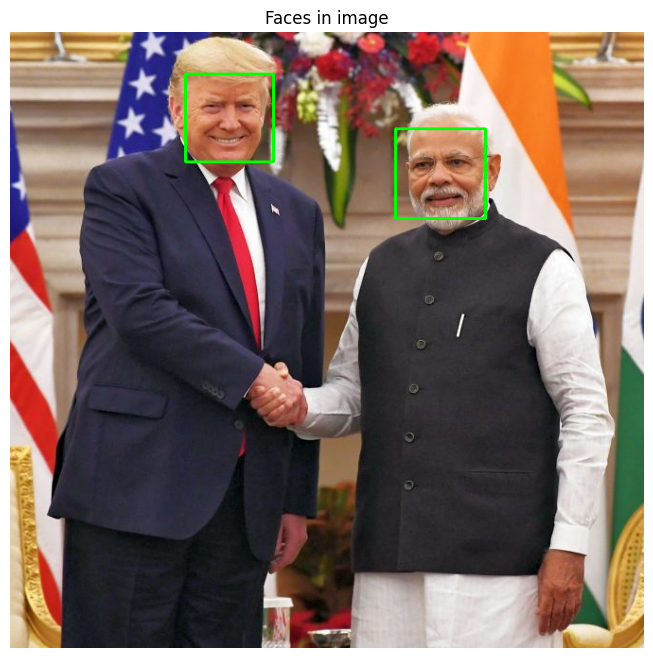

In [1]:
#importing the required libraries
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

#loading the image to detect
image_to_detect = cv2.imread('images/testing/trump-modi.jpg')
#load the pretrained haar classifier model
face_detection_classifier = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
#detect all face locations using the haar classifier
all_face_locations = face_detection_classifier.detectMultiScale(image_to_detect)
#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#list to store individual faces
face_images = []

#looping through the face locations
for index,current_face_location in enumerate(all_face_locations):
    #splitting the tuple to get the four position values of current face
    x,y,width,height = current_face_location
    #start co-ordinates
    left_x, left_y = x,y
    #end co-ordinates
    right_x, right_y = x+width, y+height
    #printing the location of current face
    print('Found face {} at left_x:{},left_y:{},right_x:{},right_y:{}'.format(index+1,left_x,left_y,right_x,right_y))
    #slicing the current face from main image
    current_face_image = image_to_detect[left_y:right_y,left_x:right_x]
    #store face for display later
    face_images.append(current_face_image)
    #draw bounding box around the faces
    cv2.rectangle(image_to_detect,(left_x,left_y),(right_x,right_y),(0,255,0),2)

#show individual faces
for index, face_img in enumerate(face_images):
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.title("Face no " + str(index+1))
    plt.axis('off')
    plt.show()

#show the main image with all faces
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_to_detect, cv2.COLOR_BGR2RGB))
plt.title("Faces in image")
plt.axis('off')
plt.show()